## **Analise das Startups Unicórnios**

"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma empresa iniciante de capital fechado com valor superior a US$ 1 bilhão. As startups adquirem esse título através de um investimento de capital de risco - venture capital - que alavanca o crescimento. Do ponto de vista de Gustavo Geriun, cofundador do Distrito, o objetivo com o levantamento é compartilhar quais startups impulsionam o crescimento do país quando o assunto é inovação. "Vale destacar que nossa intenção não é saudar o valuation bilionário como um fim em si, mas reconhecer os negócios que estão colocando o país no mapa de inovação global e apontar quais outras empresas seguem trajetórias semelhantes"

https://www.gazetadopovo.com.br/gazz-conecta/17-startups-brasileiras-que-devem-virar-unicornios-em-2021/ 
Copyright © 2022, Gazeta do Povo. Todos os direitos reservados.

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('startups_unicornios.csv')
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
1181,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1182,FourKites,$1,6/21/2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1183,VulcanForms,$1,7/5/2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1184,SingleStore,$1,7/12/2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"


**Limpeza dos dados**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [4]:
df.duplicated().value_counts()

False    1186
dtype: int64

In [5]:
#Retirando o cifrão da coluna Valuation
df['Valuation ($B)'] = df['Valuation ($B)'].apply(lambda x: x.split('$')[-1])


In [6]:
#Transformando os valores da coluna Valuation para float
df['Valuation ($B)'] = df['Valuation ($B)'].astype(float)


In [7]:
#Transformando a coluna 'Date Joined' para tipo datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Date Joined'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [8]:
#Criando uma coluna com o ano da fundação
df['Fundação'] = df['Date Joined'].dt.year

In [9]:
#Conferindo se os nomes dos Países estão corretos
df['Country'].unique()

array(['China', 'United States', 'Australia', 'United Kingdom', 'Bahamas',
       'India', 'Indonesia', 'Germany', 'Turkey', 'Hong Kong',
       'Seychelles', 'Sweden', 'Mexico', 'Estonia', 'Canada',
       'Netherlands', 'France', 'Israel', 'Finland', 'Colombia',
       'Belgium', 'Brazil', 'South Korea', 'Denmark', 'Switzerland',
       'Lithuania', 'Austria', 'Ireland', 'Singapore', 'Vietnam',
       'United Arab Emirates', 'Argentina', 'Spain', 'Japan',
       'Luxembourg', 'Nigeria', 'Philippines', 'Croatia', 'Senegal',
       'Malaysia', 'Bermuda', 'Norway', 'South Africa', 'Ecuador',
       'Chile', 'Thailand', 'Czech Republic', 'Italy'], dtype=object)

In [10]:
Asia = ['China', 'India', 'Indonesia', 'Turkey','Hong Kong','Israel','South Korea', 'Singapore','Vietnam','United Arab Emirates',
'Japan','Philippines','Malaysia','Thailand']
America = ['United States','Bahamas','Mexico','Canada','Colombia','Brazil','Argentina','Bermuda','Ecuador','Chile']
Africa = ['Seychelles', 'Nigeria','Senegal','South Africa']
Europa = ['United Kingdom','Germany','Sweden','Estonia','Netherlands','France','Finland','Belgium','Denmark','Switzerland',
'Lithuania','Austria','Ireland','Spain','Luxembourg','Croatia','Norway','Czech Republic','Italy']
Oceania = ['Australia']

In [11]:
#Criando coluna continentes
def continentes(linha):
    for x in Asia:
        if x in linha['Country']:
            linha['Continente'] = 'Asia'
    for y in America:
        if y in linha['Country']:
            linha['Continente'] = 'America'
    for i in Africa:
        if i in linha['Country']:
            linha['Continente'] = 'Africa'
    for a in Europa:
        if a in linha['Country']:
            linha['Continente'] = 'Europa'
    for b in Oceania:
        if b in linha['Country']:
            linha['Continente'] = 'Oceania'                               
    return linha


df = df.apply(continentes, axis=1)    

In [12]:
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Fundação,Continente
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,Asia
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,America
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,Asia
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,America
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,Oceania
...,...,...,...,...,...,...,...,...,...
1181,LeadSquared,1.0,2022-06-21,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West...",2022,Asia
1182,FourKites,1.0,2022-06-21,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu...",2022,America
1183,VulcanForms,1.0,2022-07-05,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr...",2022,America
1184,SingleStore,1.0,2022-07-12,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective",2022,America


In [13]:
#Conferindo os valores únicos das Industrias para ver se precisa de ajuste
df['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [14]:
#Transformando a coluna Industry em lista para fazer alterações
industria = df[df['Industry'].str.contains(',')]['Industry'].unique().tolist()
industria

['Supply chain, logistics, & delivery',
 'Sequoia Capital, Thoma Bravo, Softbank',
 'Tiger Global Management, Tiger Brokers, DCM Ventures',
 'Jungle Ventures, Accel, Venture Highway',
 'GIC. Apis Partners, Insight Partners',
 'Vision Plus Capital, GSR Ventures, ZhenFund',
 'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
 '500 Global, Rakuten Ventures, Golden Gate Ventures',
 'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
 'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
 'Dragonfly Captial, Qiming Venture Partners, DST Global',
 'SingTel Innov8, Alpha JWC Ventures, Golden Gate Ventures',
 'Mundi Ventures, Doqling Capital Partners, Activant Capital',
 'Vertex Ventures SE Asia, Global Founders Capital, Visa Ventures',
 'Andreessen Horowitz, DST Global, IDG Capital',
 "B Capital Group, Monk's Hill Ventures, Dynamic Parcel Distribution",
 'Temasek, Guggenheim Investments, Qatar Investment Authority']

In [15]:
#Tirando os nomes repetidos
industria_antes = list(set(industria))

#Criando a lista com os novos nomes para substituir
industria_depois = [n.split(',')[0] for n in industria_antes]

In [16]:
industria_depois

['Vertex Ventures SE Asia',
 '500 Global',
 'Mundi Ventures',
 'Andreessen Horowitz',
 'SingTel Innov8',
 'Dragonfly Captial',
 'Sequoia Capital China',
 'Temasek',
 'Hopu Investment Management',
 'Tiger Global Management',
 'B Capital Group',
 'Vision Plus Capital',
 'GIC. Apis Partners',
 'Jungle Ventures',
 'Sequoia Capital',
 'Supply chain',
 'Sequoia Capital China']

In [17]:
#Criando dicinário para substituição
dict_industria = {x:y for x,y in zip(industria_antes,industria_depois)}

In [18]:
df['Industry'].replace(dict_industria,inplace=True)

In [19]:
df['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services', 'Supply chain',
       'Data management & analytics', 'Sequoia Capital', 'Edtech',
       'Hardware', 'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi', 'Tiger Global Management', 'Jungle Ventures',
       'Artificial Intelligence', 'GIC. Apis Partners',
       'Vision Plus Capital', 'Hopu Investment Management', 'Internet',
       '500 Global', 'Sequoia Capital China', 'Dragonfly Captial',
       'SingTel Innov8', 'Mundi Ventures', 'Vertex Ventures SE Asia',
       'Andreessen Horowitz', 'B Capital Group', 'Temasek'], dtype=object)

In [20]:
#Com a duplicação da 'Artificial Intelligence', substitui para ficar com um termo apenas
inteligencia_artificial = {
    'Artificial intelligence': 'Artificial Intelligence'
}

df['Industry'].replace(inteligencia_artificial,inplace=True)

**Análise dos dados**

In [21]:
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Fundação,Continente
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,Asia
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,America
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,Asia
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,America
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,Oceania
...,...,...,...,...,...,...,...,...,...
1181,LeadSquared,1.0,2022-06-21,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West...",2022,Asia
1182,FourKites,1.0,2022-06-21,United States,Chicago,Supply chain,"Hyde Park Venture Partners, Bain Capital Ventu...",2022,America
1183,VulcanForms,1.0,2022-07-05,United States,Burlington,Supply chain,"Eclipse Ventures, D1 Capital Partners, Industr...",2022,America
1184,SingleStore,1.0,2022-07-12,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective",2022,America


- Países com maiores valores acumulados das startups
- Top startups e Company
- Tratejória do crescimento das startups por ano
- Tipos de industria mais presentes no setor de startups
- Países com maiores quantidades de startups
- Startups no Brasil (tragetória,setor,capital)
- Análise por continente



In [23]:
#Acumulado por país
acumulado_paises = df.groupby('Country').agg({'Valuation ($B)':'sum'}).sort_values(by='Valuation ($B)',ascending=False).reset_index().head(10)
acumulado_paises

,Country,Valuation ($B)
0,United States,2069.89
1,China,678.59
2,United Kingdom,205.45
3,India,202.92
4,Germany,80.88
5,France,58.42
6,Australia,54.40
7,Canada,49.23
8,Israel,48.02
9,Brazil,40.08


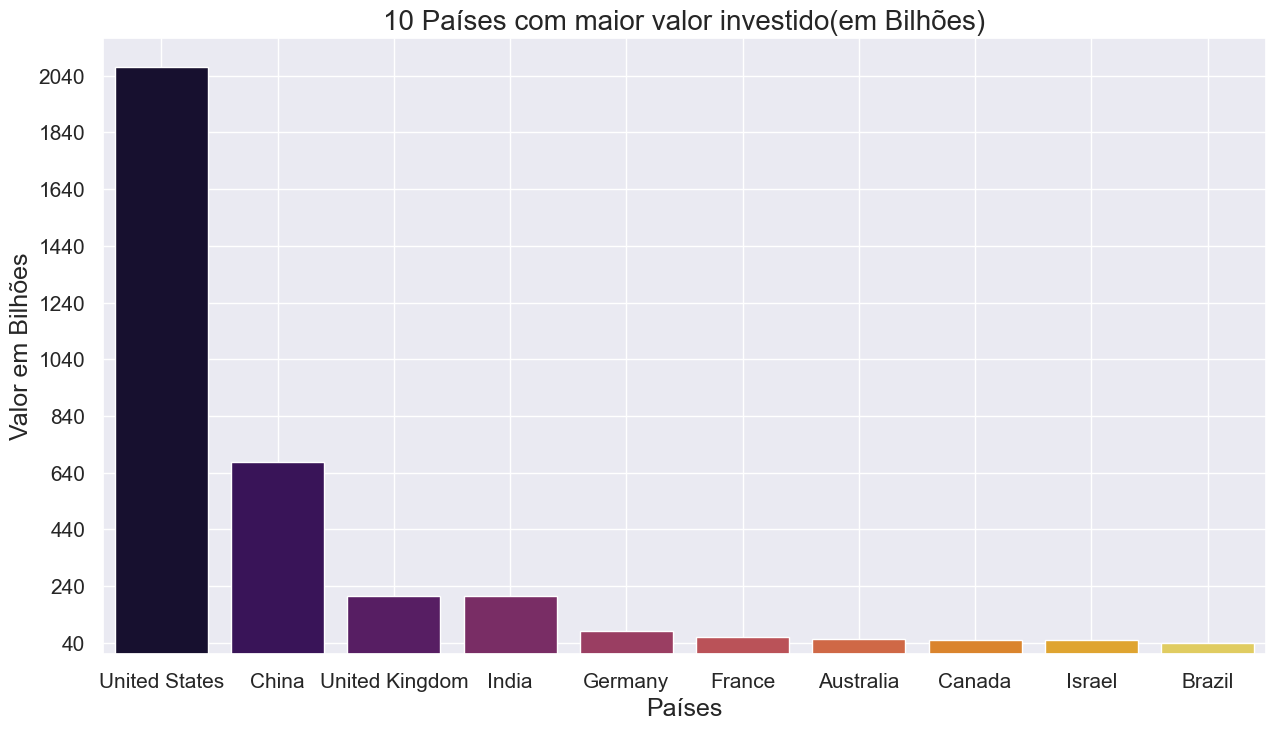

In [141]:
sns.set_theme()
plt.figure(figsize=(15,8))
plt.title('10 Países com maior valor investido(em Bilhões)',fontsize=20)
sns.barplot(data=acumulado_paises, x='Country', y='Valuation ($B)', dodge=False, palette='inferno')


xticks = np.arange(40, 2070,200)
plt.grid(axis='x')
plt.xticks(fontsize=15);
plt.xlabel('Países',fontsize=18,labelpad=5 )
plt.yticks(xticks, fontsize=15);
plt.ylabel('Valor em Bilhões',fontsize=18)
plt.show()

In [26]:
#Trajetória de crescimento por ano
crescimento_anual = df.groupby('Fundação')['Company'].count().to_frame().reset_index()
crescimento_anual

,Fundação,Company
0,2007,1
1,2011,2
2,2012,4
3,2013,3
4,2014,12
5,2015,34
6,2016,21
7,2017,44
8,2018,98
9,2019,102


Text(0.5, 1.0, 'Trajetória do crescimento das Startups por ano')

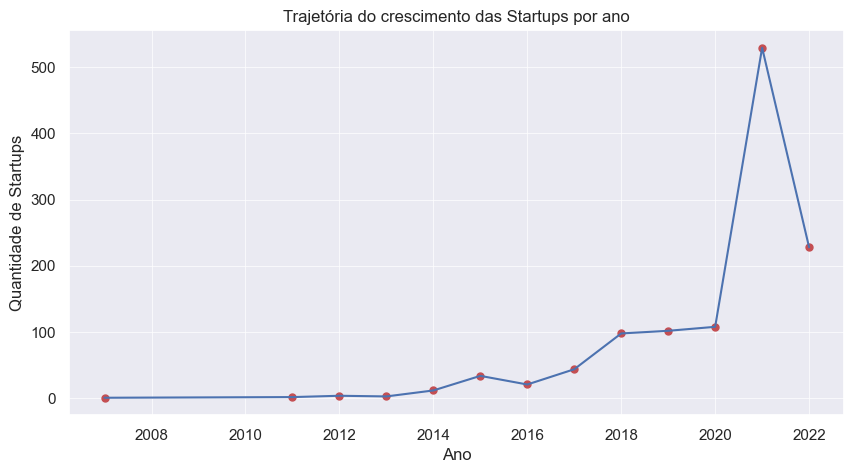

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.lineplot(x='Fundação', y='Company', data=crescimento_anual)
plt.scatter(x='Fundação', y='Company', data=crescimento_anual, color = "r", marker = ".", s =100)
plt.ylabel('Quantidade de Startups')
plt.xlabel('Ano')
plt.grid(linewidth=0.5)
plt.title('Trajetória do crescimento das Startups por ano')

In [28]:
#Tipos de industria mais presentes nas startups
tipo_industria = df['Industry'].value_counts().to_frame().reset_index().head(10)
tipo_industria.rename(columns={'index':'Industry', 'Industry':'Count'},inplace=True)
tipo_industria


,Industry,Count
0,Fintech,239
1,Internet software & services,224
2,E-commerce & direct-to-consumer,103
3,Health,94
4,Artificial Intelligence,85
5,Supply chain,65
6,Other,65
7,Cybersecurity,58
8,Data management & analytics,45
9,Auto & transportation,40


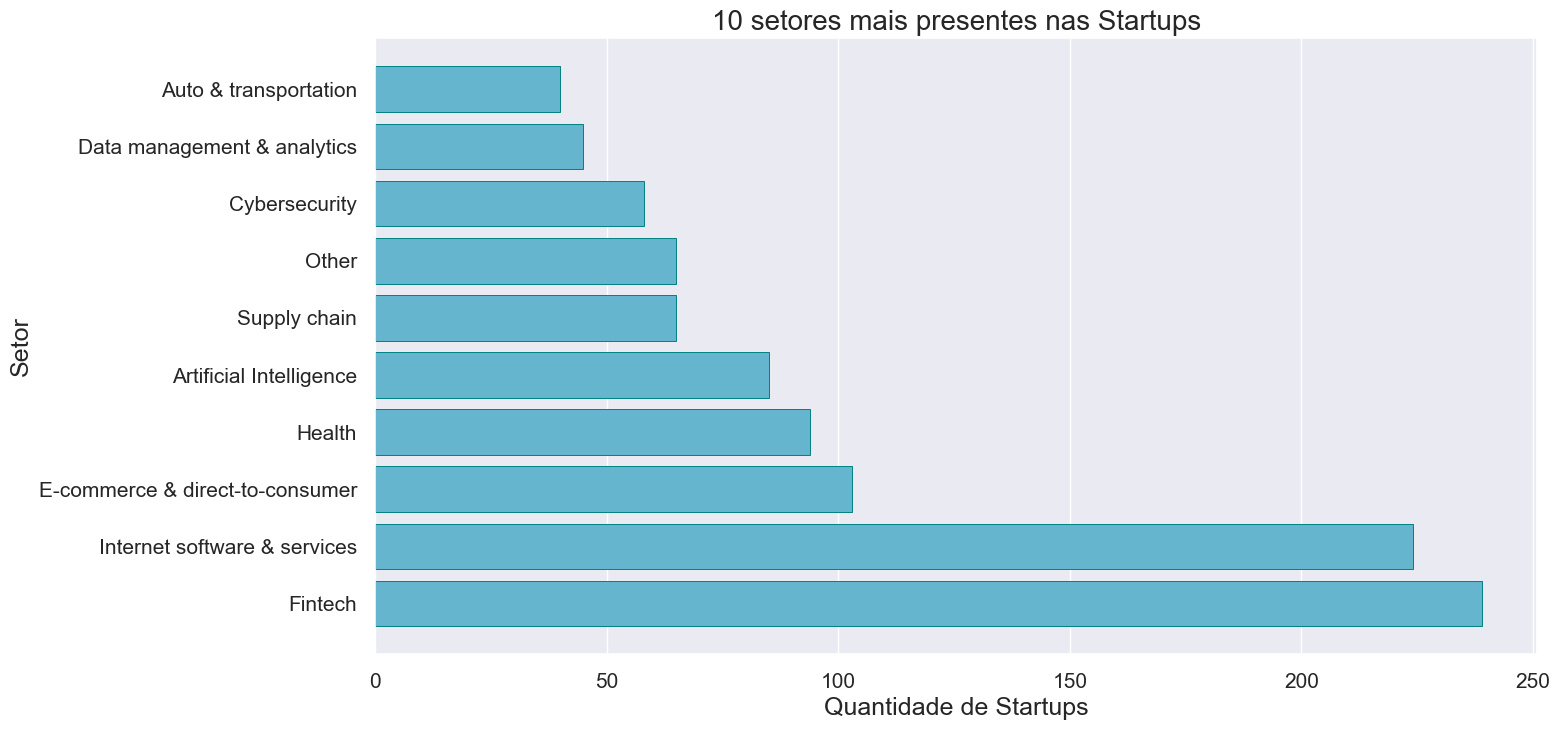

In [142]:
plt.figure(figsize=(15,8))
plt.barh(tipo_industria['Industry'],tipo_industria['Count'],color= 'c',edgecolor='teal', linewidth=0.7)

plt.grid(axis='y')
plt.xticks(fontsize=15);
plt.xlabel('Quantidade de Startups',fontsize=18)
plt.yticks(fontsize=15);
plt.ylabel('Setor',fontsize=18)
plt.title('10 setores mais presentes nas Startups',fontsize=20)
plt.show()

O Brasil encontra-se entre os 10 países com mais investimentos em startups e apesar da enorme diferença para investimentos realizados nos Estados Unidos, é algo positivo pois mostra a capacidade de estruturação desses negócios e a tendência no mercado, apesar da queda no crescimento no ano de 2022. Os principais segmentos mundiais são Fintech e Internet software.

In [30]:
#Maiores startups
maiores_startups = df.sort_values(by='Valuation ($B)', ascending=False).head(10)
maiores_startups

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Fundação,Continente
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,Asia
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,America
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018,Asia
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,America
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,Oceania
5,Checkout.com,40.0,2019-05-02,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",2019,Europa
6,Instacart,39.0,2014-12-30,United States,San Francisco,Supply chain,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014,America
7,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2019,America
8,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",2018,Europa
10,FTX,32.0,2021-07-20,Bahamas,Fintech,Sequoia Capital,NaN,2021,America


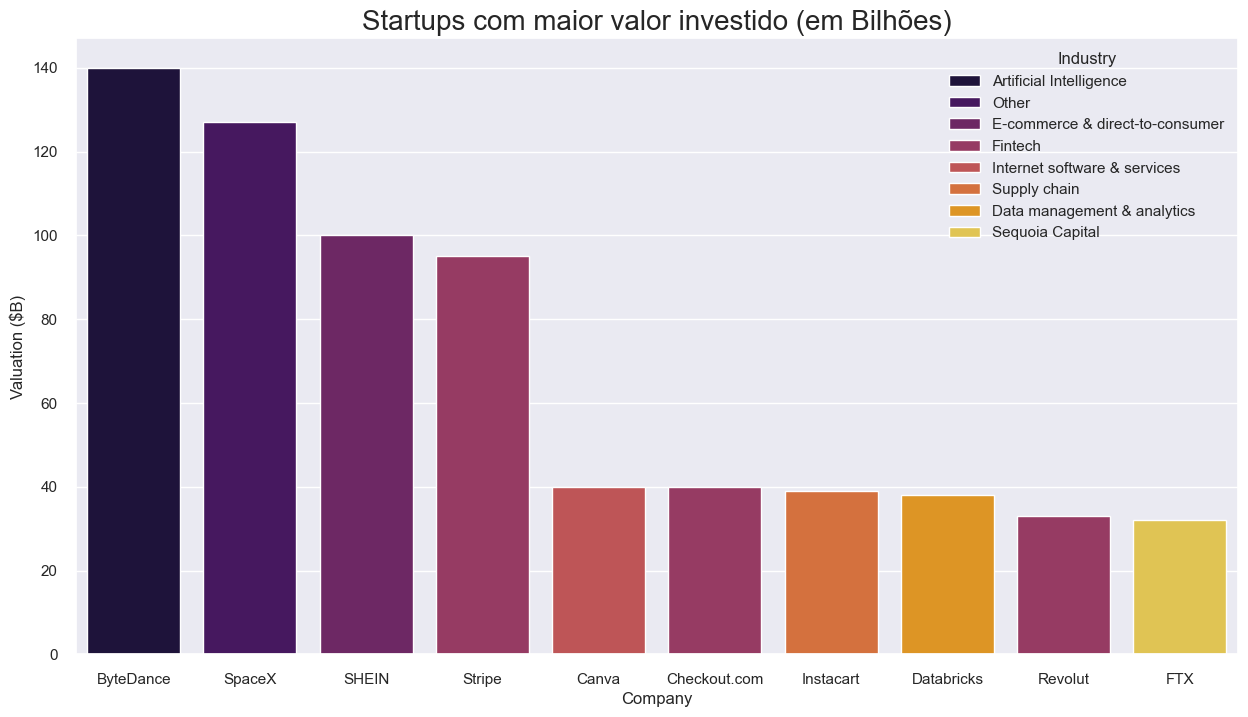

In [143]:
maiores_startups = df.sort_values(by='Valuation ($B)', ascending=False).head(10)
plt.figure(figsize=(15,8))
plt.title('Startups com maior valor investido (em Bilhões)', fontsize=20)
figure = sns.barplot(data=maiores_startups, x='Company', y='Valuation ($B)', hue='Industry', dodge=False, palette='inferno')

In [32]:
#Países com maiores números de startups
paises_startups = df['Country'].value_counts().head(10)

paises_startups

United States     636
China             174
India              70
United Kingdom     46
Germany            29
France             24
Israel             22
Canada             19
Brazil             17
South Korea        17
Name: Country, dtype: int64

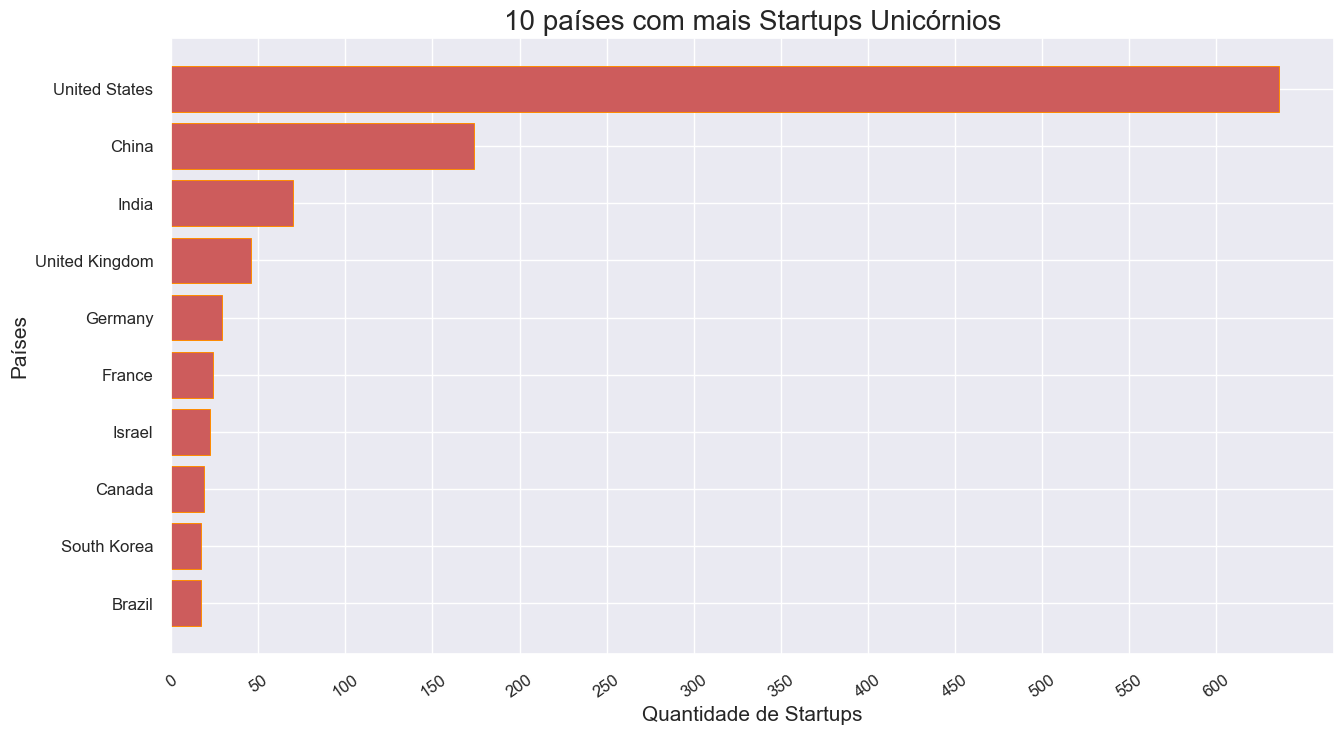

In [144]:

plt.figure(figsize=(15,8))
plt.barh(paises_startups.sort_values().index, paises_startups.sort_values(), color='indianred', edgecolor='darkorange', linewidth=0.7)

xticks = np.arange(0,640,50)
plt.xticks(xticks,rotation=35,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Países',fontsize=15)
plt.xlabel('Quantidade de Startups',fontsize=15)
plt.title('10 países com mais Startups Unicórnios', fontsize=20)
plt.show()

In [34]:
continente_count = df['Continente'].value_counts()
continente_count

America    689
Asia       329
Europa     155
Oceania      8
Africa       5
Name: Continente, dtype: int64

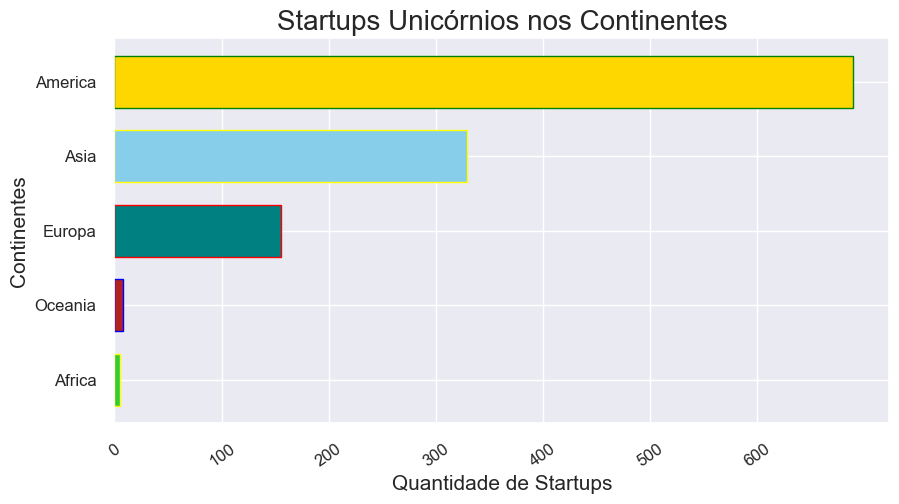

In [145]:
colors=['limegreen','firebrick','teal','skyblue','gold']
edgecolors = ['yellow','blue','red','yellow','green']
plt.figure(figsize=(10,5))
plt.barh(continente_count.sort_values().index, continente_count.sort_values(), color=colors, edgecolor=edgecolors, height=0.7, linewidth=1)

xticks = np.arange(0,690,100)
plt.xticks(xticks,rotation=35,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Continentes',fontsize=15)
plt.xlabel('Quantidade de Startups',fontsize=15)
plt.title('Startups Unicórnios nos Continentes', fontsize=20)
plt.show()



In [72]:
continente_startups = df.groupby(['Fundação','Continente'])['Company'].count().to_frame().reset_index()

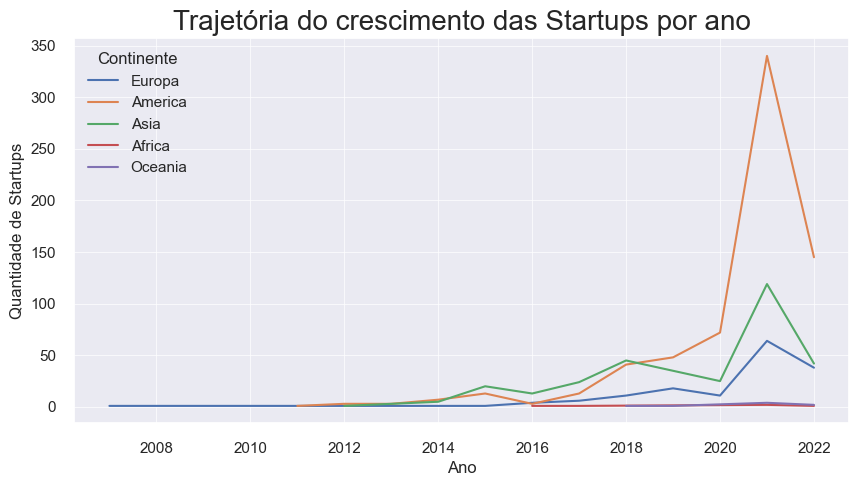

In [146]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.lineplot(x='Fundação', y='Company', data=continente_startups, hue='Continente')

plt.ylabel('Quantidade de Startups')
plt.xlabel('Ano')
plt.grid(linewidth=0.5)
plt.title('Trajetória do crescimento das Startups por ano',fontsize=20)
plt.show()

**Startups no Brasil**

In [79]:
#Startups no Brasil
df_brasil = df[df['Country'] == 'Brazil']
df_brasil

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Fundação,Continente
132,QuintoAndar,5.10,2019-09-09,Brazil,Campinas,E-commerce & direct-to-consumer,"Kaszek Ventures, General Atlantic, SoftBank Group",2019,America
133,C6 Bank,5.05,2020-12-02,Brazil,Sao Paulo,Fintech,Credit Suisse,2020,America
158,Creditas,4.80,2020-12-18,Brazil,Sao Paulo,Fintech,"Kaszek Ventures, Amadeus Capital Partners, Quo...",2020,America
283,Nuvemshop,3.10,2021-08-17,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Kaszek Ventures, Qualcomm Ventures, Accel",2021,America
291,Wildlife Studios,3.00,2019-12-05,Brazil,Sao Paulo,Other,"Benchmark, Bessemer Venture Partners",2019,America
323,Loft,2.90,2020-01-03,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Monashees+, Andreessen Horowitz, QED Investors",2020,America
350,Unico,2.60,2021-08-03,Brazil,Sao Paulo,Artificial Intelligence,"Big Bets, General Atlantic, SOFTBANK Latin Ame...",2021,America
423,CloudWalk,2.15,2021-09-08,Brazil,Sao Paulo,Fintech,"Plug and Play Ventures, Valor Capital Group, D...",2021,America
470,Loggi,2.00,2019-06-05,Brazil,Sao Paulo,Supply chain,"Qualcomm Ventures, SoftBank Group. Monashees+",2019,America
643,Olist,1.50,2021-12-15,Brazil,Curitiba,E-commerce & direct-to-consumer,"Redpoint e.ventures, Valor Capital Group, Soft...",2021,America


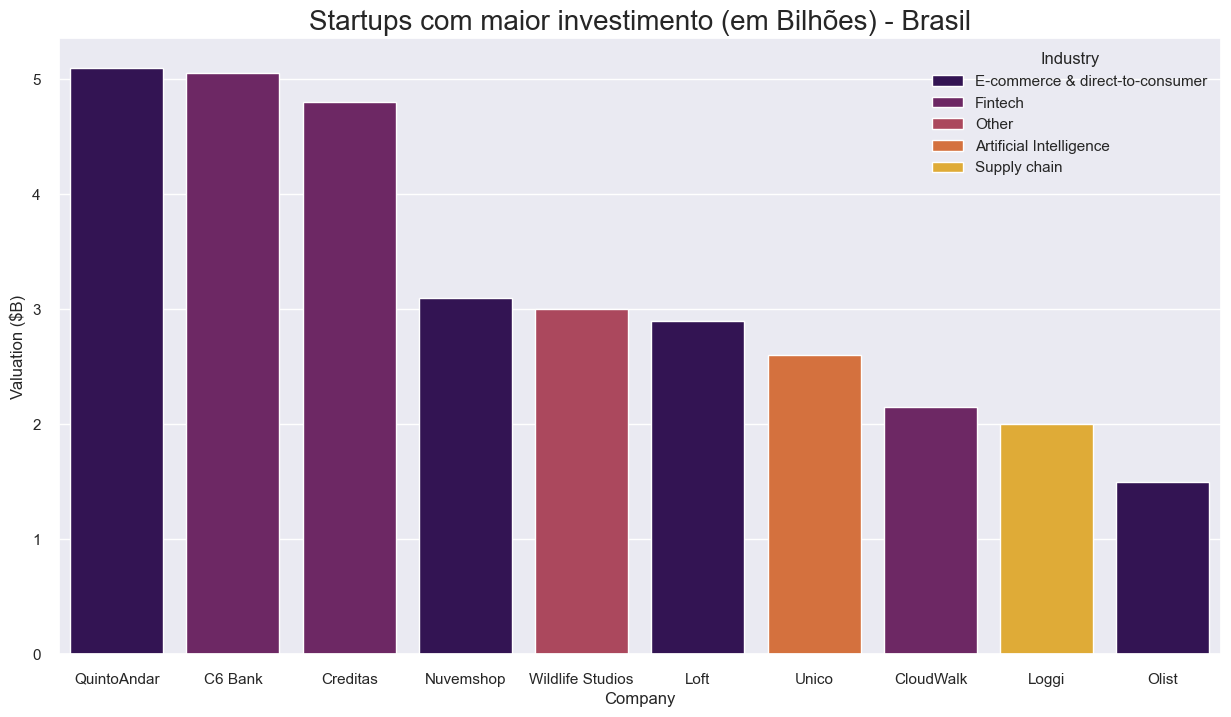

In [147]:
maiores_startups_br = df_brasil.sort_values(by='Valuation ($B)', ascending=False).head(10)
plt.figure(figsize=(15,8))
plt.title('Startups com maior investimento (em Bilhões) - Brasil', fontsize=20)
figure = sns.barplot(data=maiores_startups_br, x='Company', y='Valuation ($B)', hue='Industry', dodge=False, palette='inferno')

**Tragetória anual das Startups unicórnios no Brasil**

In [93]:
brasil_anual = df_brasil['Fundação'].value_counts().to_frame().reset_index()
brasil_anual

,index,Fundação
0,2021,6
1,2019,4
2,2020,3
3,2022,2
4,2018,2


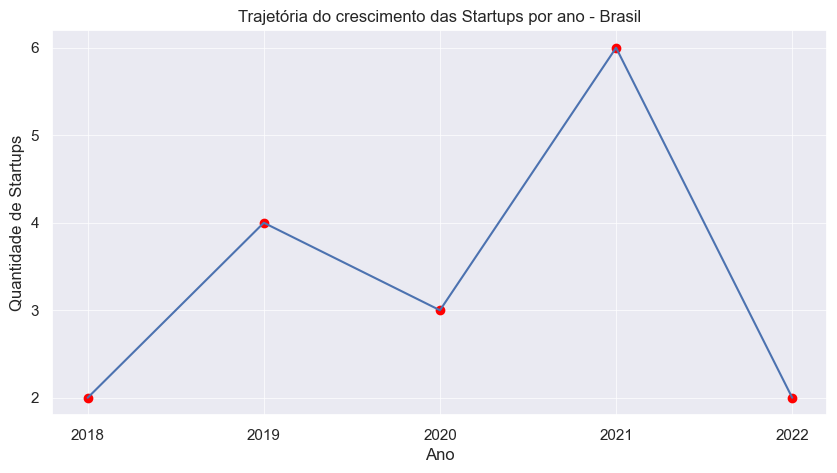

In [101]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.lineplot(x='index', y='Fundação', data=brasil_anual)
plt.scatter(x='index', y='Fundação', data=brasil_anual, color='red')

xticks = np.arange(2018,2023,1)
yticks = np.arange(2,7,1)
plt.xticks(xticks)
plt.yticks(yticks)
plt.ylabel('Quantidade de Startups')
plt.xlabel('Ano')
plt.grid(linewidth=0.5)
plt.title('Trajetória do crescimento das Startups por ano - Brasil')
plt.show()

**Setores mais presentes nas Startups brasileiras**

In [132]:
setores_brasil = df_brasil['Industry'].value_counts()
setores_brasil 

Fintech                            6
E-commerce & direct-to-consumer    5
Supply chain                       3
Other                              1
Artificial Intelligence            1
Mobile & telecommunications        1
Name: Industry, dtype: int64

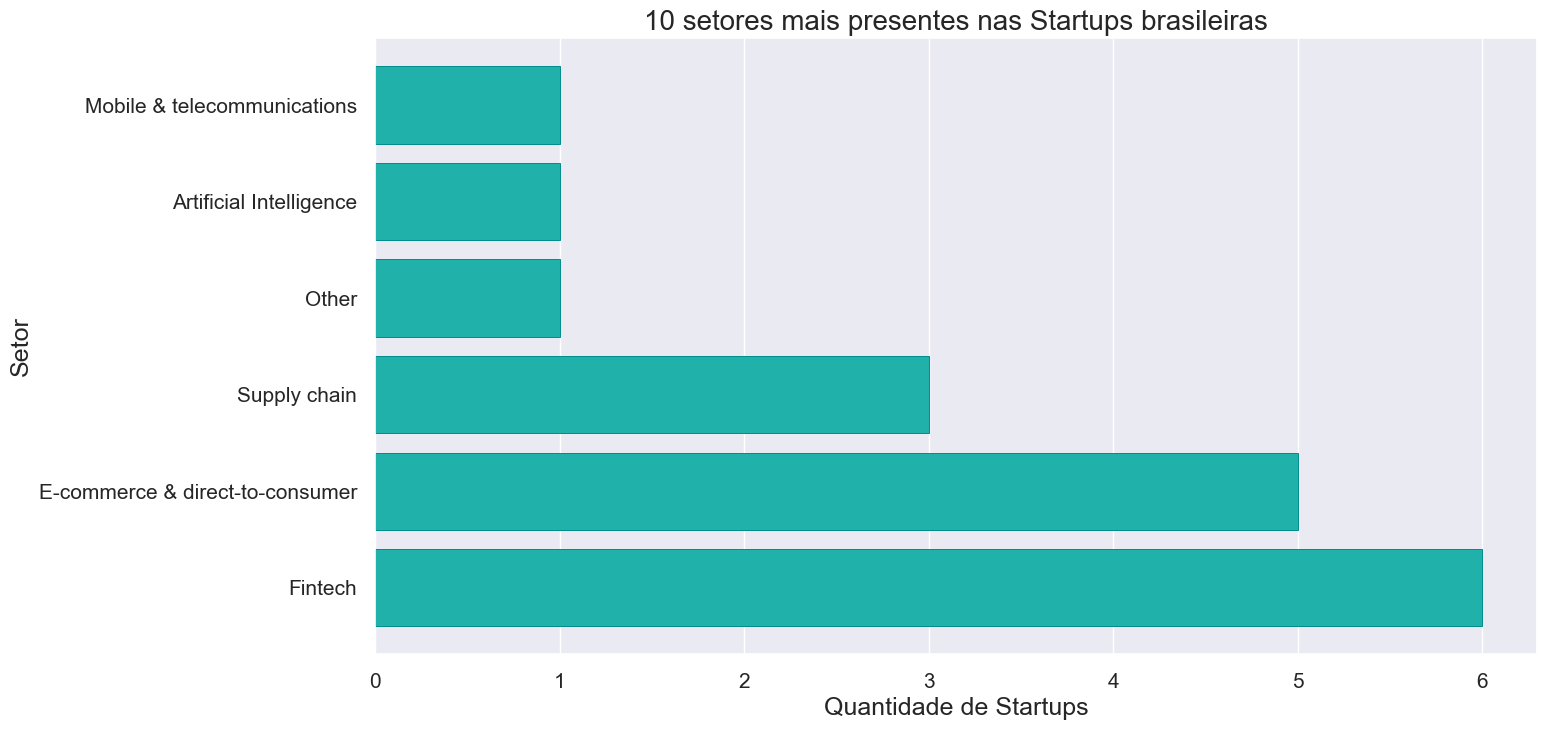

In [148]:
plt.figure(figsize=(15,8))
plt.barh(setores_brasil.index,setores_brasil, color= 'lightseagreen',edgecolor='darkcyan', linewidth=0.7)

plt.grid(axis='y')
plt.xticks(fontsize=15);
plt.xlabel('Quantidade de Startups',fontsize=18)
plt.yticks(fontsize=15);
plt.ylabel('Setor',fontsize=18)
plt.title('10 setores mais presentes nas Startups brasileiras',fontsize=20)
plt.show()

In [1]:
fig, ax = plt.subplots(figsize=(15, 15) )

Cor_Fundo = '#f0f0f0'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

plt.style.use('seaborn')
plt.suptitle('Startups Unicórnios no Brasil', fontsize=25, color='#dd1c77', fontweight=600 )

Linhas = 3
Colunas = 1

#Gráfico1
plt.subplot(Linhas, Colunas, 1)
plt.title('Startups com maior investimento (em Bilhões) - Brasil', fontsize=20)
figure = sns.barplot(data=maiores_startups_br, x='Company', y='Valuation ($B)', hue='Industry', dodge=False, palette='inferno');


#Grafico2
plt.subplot(Linhas, Colunas, 2)
plt.barh(setores_brasil.index,setores_brasil, color= 'lightseagreen',edgecolor='darkcyan', linewidth=0.7)

plt.grid(axis='y')
plt.xticks(fontsize=15);
plt.xlabel('Quantidade de Startups',fontsize=18)
plt.yticks(fontsize=15);
plt.ylabel('Setor',fontsize=18)
plt.title('10 setores mais presentes nas Startups brasileiras',fontsize=20)



#Grafico3
plt.subplot(Linhas, Colunas,3)
sns.set_theme(style="darkgrid")
sns.lineplot(x='index', y='Fundação', data=brasil_anual)
plt.scatter(x='index', y='Fundação', data=brasil_anual, color='red')

xticks = np.arange(2018,2023,1)
yticks = np.arange(2,7,1)
plt.xticks(xticks)
plt.yticks(yticks)
plt.ylabel('Quantidade de Startups',fontsize=15)
plt.xlabel('Ano',fontsize=15)
plt.grid(linewidth=0.5)
plt.title('Trajetória do crescimento das Startups por ano - Brasil',fontsize=20)







#Ajustar os espaçamentos das figuras
plt.subplots_adjust( hspace=0.8, wspace=0.8 )

NameError: name 'plt' is not defined

A Startup unicórnio com maior Valuation (valor de investimento) no Brasil, é a Quinto Andar, no segmento de E-commerce. Analisando a quantidade total das startups unicórnios nacionais, os segmentos mais presentes são Fintech e E-commerce e seguindo a trajetória mundial, o ano de maior crescimento é o de 2021 e logo depois apresentando uma queda em 2022.

## **Conclusão**

É perceptível o crescimento gigantescos das Startups unicórnios pelo mundo, principalmente no ano de 2021 onde teve seu maior crescimento devido um crescente investimento nesse segmento graças a taxa de juros baixa e um grande interesse por empresas tech. Foi um dos setores que menos sofreram com a crise sanitária causada pela pandemia do covid-19. Com esse crescimento acelerado essas startups investiram forte na atração de talentos, com salários acima da média. Em 2022, podemos ver através dos gráficos que os números despencam, segundo a plataforma Distrito, isso se explica pelos investimentos em startups recuarem em 44% devido o aumento na taxa de juros e na inflação, no Brasil e no mundo.
